In [85]:
import matplotlib.pyplot as plt
from pandas import DataFrame
import json

In [384]:
    filename = "../data/simulations/sc23_node/3reg_N42_p5.jsonterms_Otamaki_60_M30_cM24

In [385]:
data = json.load(open(filename))
data.keys()

dict_keys(['time', 'elapsed', 'memory', 'memory_history', 'nvmemory', 'result', 'compression'])

In [386]:
c_hist = DataFrame(data['memory_history'])
c_hist["nvmem_shift"] = c_hist["nvmem"] - c_hist["nvmem"].min()
c_hist["tensor_count"] = c_hist["tensors_sizes"].map(len)
c_hist["width"] = c_hist["tensors_sizes"].map(max)
c_hist[["nvmem", "mem", "cupy_bufsize"]]/=1e9
c_hist["mdelta"] = c_hist["nvmem"] - c_hist["cupy_bufsize"]

c_hist.head()


,mem,cupy_bufsize,nvmem,tensors_sizes,nvmem_shift,tensor_count,width,mdelta
0,0.269103,0.000668,0.93166,[2],0,1,2,0.930992
1,0.269103,0.000668,0.93166,"[2, 2]",0,2,2,0.930992
2,0.269103,0.000668,0.93166,"[2, 2, 2]",0,3,2,0.930992
3,0.269103,0.000668,0.93166,"[2, 2, 2, 2]",0,4,2,0.930992
4,0.269103,0.000668,0.93166,"[2, 2, 2, 2, 2]",0,5,2,0.930992


(800.0, 1100.0)

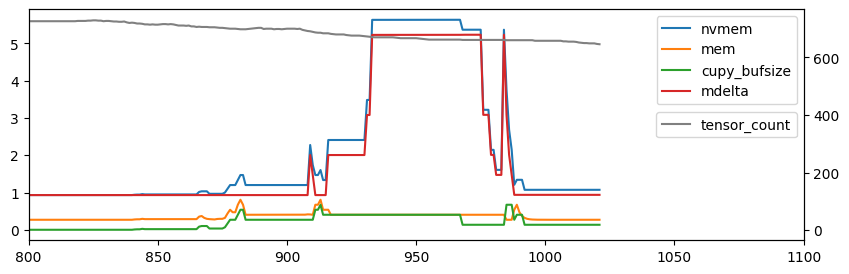

In [387]:
fig = plt.figure(figsize=(10, 3))
c_hist.iloc[:][["nvmem", "mem", "cupy_bufsize","mdelta"]].plot(ax=plt.gca())
ax2 = plt.twinx()
c_hist.iloc[:][["tensor_count"]].plot(color='gray',
                                      ax=ax2)
plt.legend(loc='center right')
plt.xlim(800, 1100)

(800.0, 1100.0)

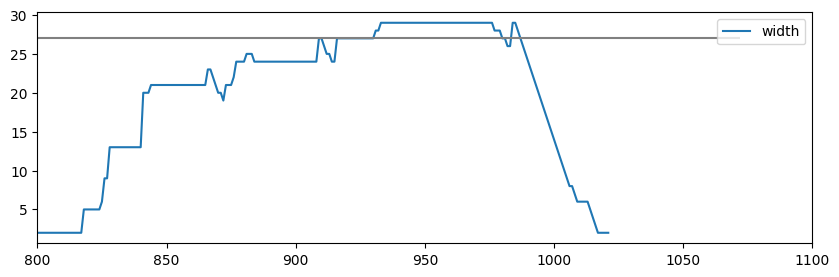

In [388]:
fig = plt.figure(figsize=(10, 3))
c_hist.iloc[:][["width"]].plot(ax=plt.gca())
plt.hlines(27, *plt.xlim(), color='gray')
plt.xlim(800, 1100)

In [389]:
data['result']

{'Re': 3.2673478926881216e-06, 'Im': 3.4282932119822362e-06}